In [2]:
%pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df= pd.read_csv('tested.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,30.191388,0.447368,0.392344,35.184211,1.133971
std,0.481622,0.841838,0.481622,12.654104,0.896760,0.981429,55.846244,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


In [22]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,0,3,0,30,0,0,8,1
414,1,1,1,39,0,0,108,2
415,0,3,0,38,0,0,7,1
416,0,3,0,30,0,0,8,1
417,0,3,0,30,1,1,22,2


In [23]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,30.191388,0.447368,0.392344,35.184211,1.133971
std,0.481622,0.841838,0.481622,12.654104,0.896760,0.981429,55.846244,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


In [24]:
df.shape

(418, 8)

In [25]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked
0       False   False  False  False  False  False  False     False
1       False   False  False  False  False  False  False     False
2       False   False  False  False  False  False  False     False
3       False   False  False  False  False  False  False     False
4       False   False  False  False  False  False  False     False
..        ...     ...    ...    ...    ...    ...    ...       ...
413     False   False  False  False  False  False  False     False
414     False   False  False  False  False  False  False     False
415     False   False  False  False  False  False  False     False
416     False   False  False  False  False  False  False     False
417     False   False  False  False  False  False  False     False

[418 rows x 8 columns]>

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [10]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [11]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [13]:
df['Age'] = df['Age'].astype(int)

In [14]:
df['Fare'] = df['Fare'].astype(int)

In [15]:
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

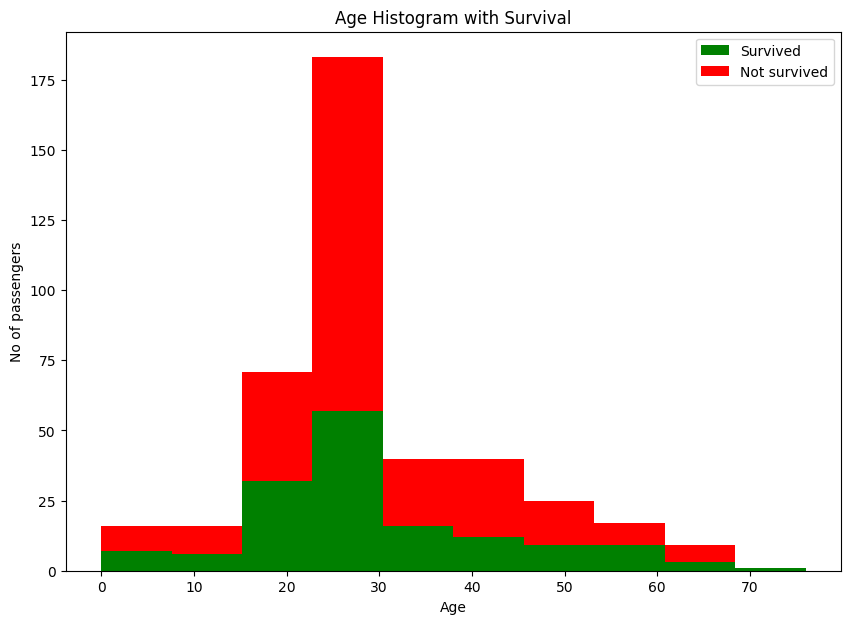

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

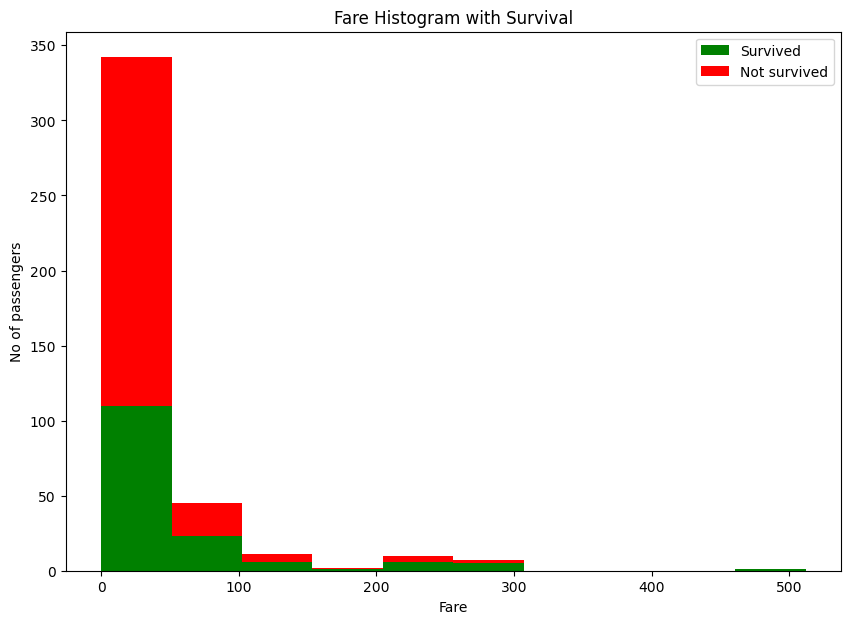

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

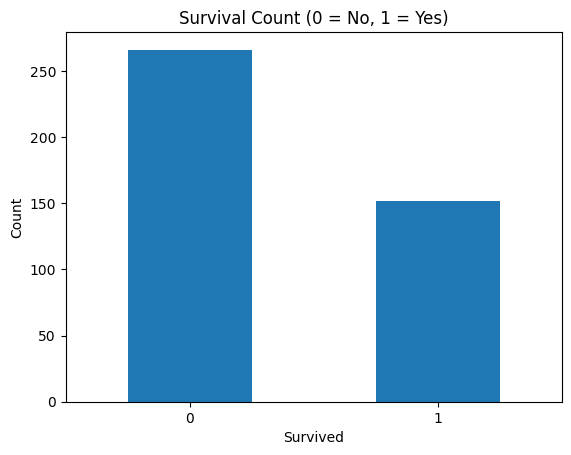

In [18]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

In [3]:
Train = data.drop(['Survived'], axis=1)
Test = data.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

<class 'NameError'>: name 'data' is not defined

In [1]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

<class 'NameError'>: name 'LogisticRegression' is not defined